L2 and L1

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
from keras.layers import *
from tensorflow.keras.models import *
import matplotlib. pyplot as pit
%matplotlib inline
import numpy as np

In [ ]:
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add (Dense(80, input_dim=3, activation='tanh', kernel_regularizer=regularizers.l2(0.001), kernel_initializer='he_uniform'))
model.add(Dropout (0.5))
model.add(Dense(80, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout (0.5))
model.add(Dense(40, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout (0.5))
model.add(Dense(40, activation='tanh', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout (0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
from keras.utils.vis_utils import plot_model
model = Sequential()
model.add(Dense (80, input_dim=3, activation='tanh', kernel_regularizer=regularizers.l1(0.001), kernel_initializer='he_uniform'))
model.add(Dropout (0,5))
model.add(Dense (80, activation='tanh', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout (0,5))
model.add(Dense (40, activation='tanh', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout (0,5))
model.add(Dense(40, activation='tanh', kernel_regularizer=regularizers.l1(0.001)))
model.add(Dropout (0.5))
model.add(Dense(1, activation='sigmoid'))


Data Augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
datagen = ImageDataGenerator(        
            rotation_range=45,
            width_shift_range=0.2,  
            height_shift_range=0.2,    
            shear_range=0.2,        
            zoom_range=0.2,        
            horizontal_flip=True,         
            fill_mode='constant', cval=125)
x = io.imread('/content/img.jpg')
x = x.reshape((1, ) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir='/content/sample_data',
                          save_prefix='aug',
                          save_format='png'):    
  i += 1    
  if i > 20:        
     break


Dropout

Train: 1.000, Test: 0.800


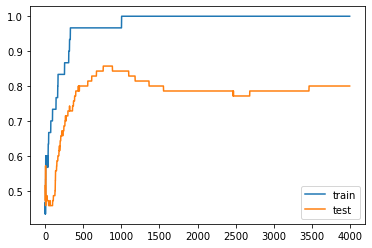

In [ ]:
# mlp overfit on the two circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()
